In [1]:
import numpy as np
import random
import time
from collections import namedtuple
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib qt
import pickle

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
final_rewards = pickle.load(open('plots/pickles/final_rewards.p', 'rb'))
future_rewards = pickle.load(open('plots/pickles/future rewards.p', 'rb'))
max_rewards = pickle.load(open('plots/pickles/max_rewards.p', 'rb'))
no_rewards = pickle.load(open('plots/pickles/no her rewards.p', 'rb'))

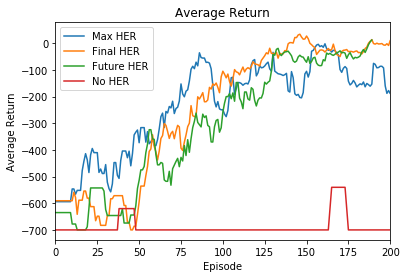

In [3]:
final_rewards = torch.tensor(final_rewards)
final_rewards = final_rewards.unfold(0, 10, 1)
final_rewards = final_rewards.sum(1)/10
final_rewards = final_rewards.view(-1)
final_rewards = torch.cat((torch.ones(9, dtype=torch.double)*final_rewards[0], final_rewards))

future_rewards = torch.cat(future_rewards).squeeze()
future_rewards = future_rewards.unfold(0, 10, 1)
future_rewards = future_rewards.sum(1)/10
future_rewards = future_rewards.view(-1)
future_rewards = torch.cat((torch.ones(9, dtype=torch.double)*future_rewards[0], future_rewards))

max_rewards = torch.cat(max_rewards).squeeze()
max_rewards = max_rewards.unfold(0, 10, 1)
max_rewards = max_rewards.sum(1)/10
max_rewards = max_rewards.view(-1)
max_rewards = torch.cat((torch.ones(9, dtype=torch.double)*max_rewards[0], max_rewards))


no_rewards = torch.cat(no_rewards).squeeze()
no_rewards = no_rewards.unfold(0, 10, 1)
no_rewards = no_rewards.sum(1)/10
no_rewards = no_rewards.view(-1)
no_rewards = torch.cat((torch.ones(9, dtype=torch.double)*no_rewards[0], no_rewards))


plt.figure(2)
plt.clf()
plt.title('Average Return')
plt.xlabel('Episode')
plt.ylabel('Average Return')
plt.plot(max_rewards.numpy())
plt.plot(final_rewards.numpy())
plt.plot(future_rewards.numpy())
plt.plot(no_rewards.numpy())
plt.xlim([0,200])
plt.legend(['Max HER', 'Final HER', 'Future HER', 'No HER'])
plt.savefig('plots/reward_10_all.png')


In [105]:
final_rewards = pickle.load(open('plots/pickles/final_successes_raw.p', 'rb'))
future_rewards = pickle.load(open('plots/pickles/future_successes_raw.p', 'rb'))
max_rewards = pickle.load(open('plots/pickles/max_successes_10.p', 'rb'))
no_rewards = pickle.load(open('plots/pickles/no her successes_raw.p', 'rb'))

tensor([0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

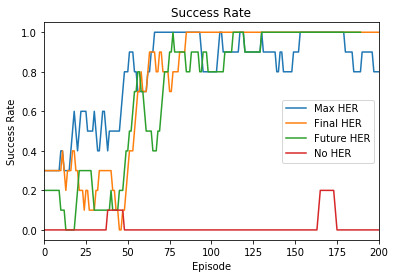

In [106]:
final_rewards = torch.tensor(final_rewards)
print(final_rewards)
final_rewards = final_rewards.unfold(0, 10, 1)
print(final_rewards)
final_rewards = final_rewards.sum(1)/10
print(final_rewards)
final_rewards = final_rewards.view(-1)
print(final_rewards)
final_rewards = torch.cat((torch.ones(9)*final_rewards[0], final_rewards))
print(final_rewards)

future_rewards = torch.tensor(future_rewards)
future_rewards = future_rewards.unfold(0, 10, 1)
future_rewards = future_rewards.sum(1)/10
future_rewards = future_rewards.view(-1)
future_rewards = torch.cat((torch.ones(9)*future_rewards[0], future_rewards))

max_rewards = torch.tensor(max_rewards)
max_rewards = max_rewards.unfold(0, 10, 1)
max_rewards = max_rewards.sum(1)/10
max_rewards = max_rewards.view(-1)
max_rewards = torch.cat((torch.ones(9)*max_rewards[0], max_rewards))


no_rewards = torch.tensor(no_rewards)
no_rewards = no_rewards.unfold(0, 10, 1)
no_rewards = no_rewards.sum(1)/10
no_rewards = no_rewards.view(-1)
no_rewards = torch.cat((torch.ones(9)*no_rewards[0], no_rewards))


plt.figure(2)
plt.clf()
plt.title('Success Rate')
plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.plot(max_rewards.numpy())
plt.plot(final_rewards.numpy())
plt.plot(future_rewards.numpy())
plt.plot(no_rewards.numpy())
plt.xlim([0,200])
plt.legend(['Max HER', 'Final HER', 'Future HER', 'No HER'])
plt.savefig('plots/reward_20_all.png')


In [89]:
future_rewards

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000, 0.1000, 0.1000, 0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.1000, 0.2000, 0.3000, 0.3000, 0.3000, 0.3000, 0.3000, 0.3000,
        0.3000, 0.3000, 0.2000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.2000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.2000, 0.2000, 0.2000, 0.3000, 0.4000, 0.4000, 0.5000, 0.5000, 0.6000,
        0.7000, 0.7000, 0.8000, 0.8000, 0.7000, 0.7000, 0.6000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.4000, 0.4000, 0.4000, 0.5000, 0.5000, 0.6000, 0.7000,
        0.8000, 0.8000, 0.8000, 0.9000, 0.9000, 1.0000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.8000, 0.8000, 0.8000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.8000, 0.8000, 0.9000, 0.9000, 0.9000, 0.8000,
        0.8000, 0.8000, 0.8000, 0.8000, 0.8000, 0.8000, 0.8000, 0.8000, 0.8000,
        0.9000, 0.9000, 0.9000, 0.9000, 

In [94]:
final_rewards

[0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

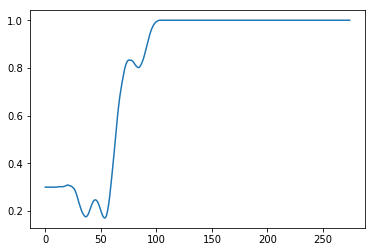

In [92]:
#plt.plot(future_rewards)
plt.plot(final_rewards)